<a href="https://colab.research.google.com/github/Belvanz/submission-akhir-BMLP/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Belvan_Savero_Achmady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [58]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [59]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Belvanz/submission-akhir-BMLP/refs/heads/main/dataset_car_sales/car_data.csv")

In [60]:
print("Jumlah baris dalam dataset:", df.shape[0])

Jumlah baris dalam dataset: 23906


In [61]:
print("Jumlah kolom dalam dataset:", df.shape[1])

Jumlah kolom dalam dataset: 16


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. Memahami Struktur Data

In [62]:
# Eksplorasi Data
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
None


In [63]:
print("\nJenis data di setiap kolom:")
print(df.dtypes)


Jenis data di setiap kolom:
Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object


In [64]:
print(df.describe())

       Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06


  2. Menangani Data yang Hilang

In [65]:
print("\n Cek Missing Values")
print(df.isnull().sum())


 Cek Missing Values
Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


3. Analisis Distribusi dan Korelasi

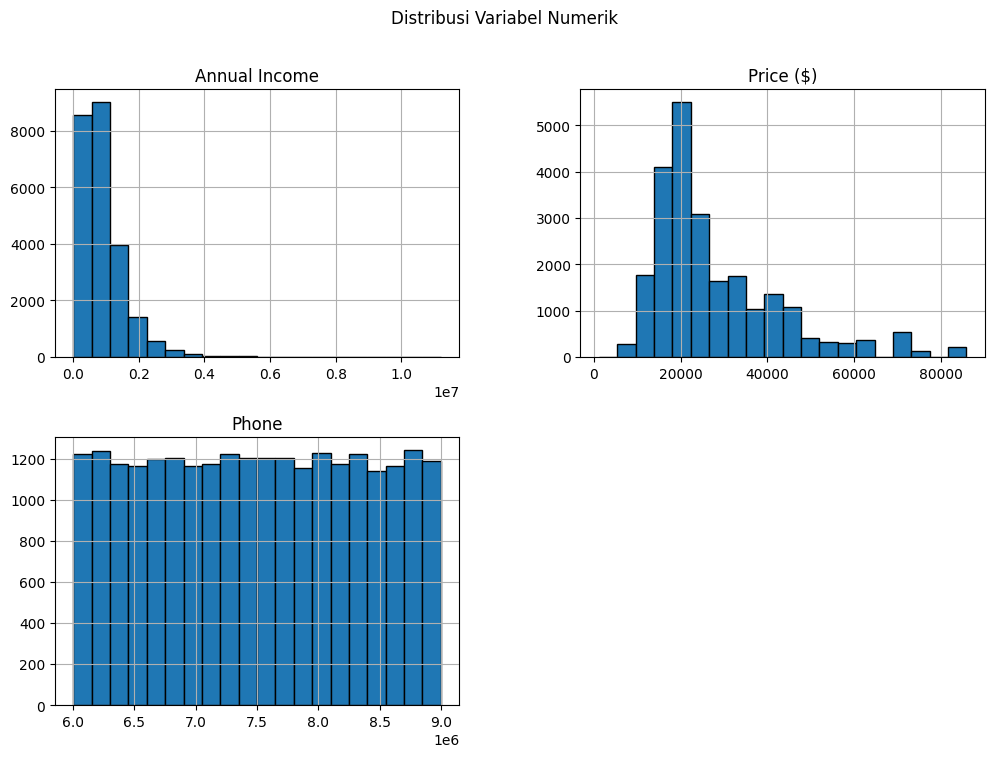

In [66]:
# Histogram untuk distribusi variabel numerik
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

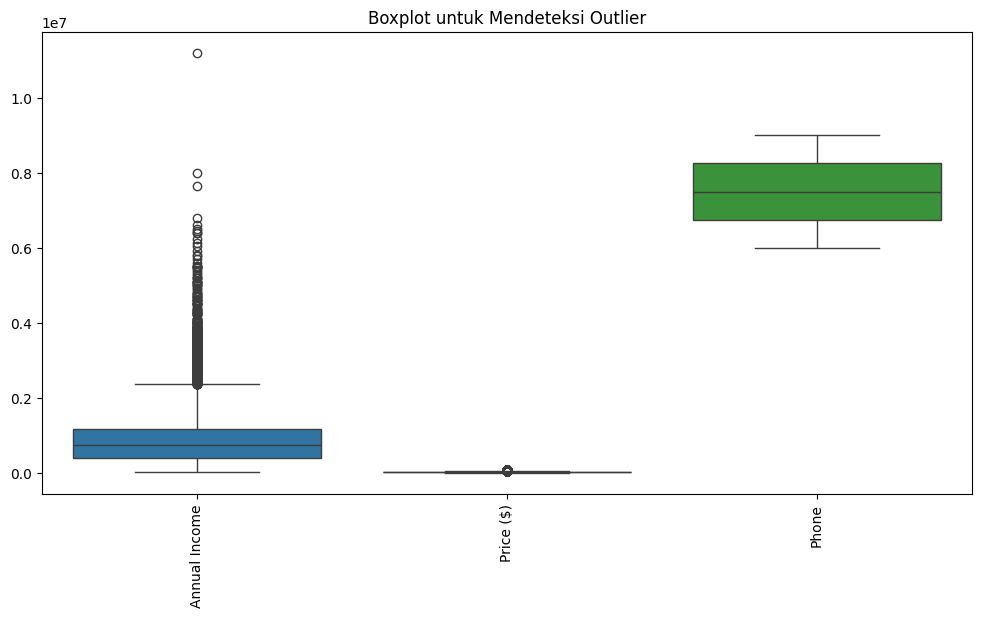

In [67]:
# Boxplot untuk melihat outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.xticks(rotation=90)
plt.show()

4. Visualisasi Data

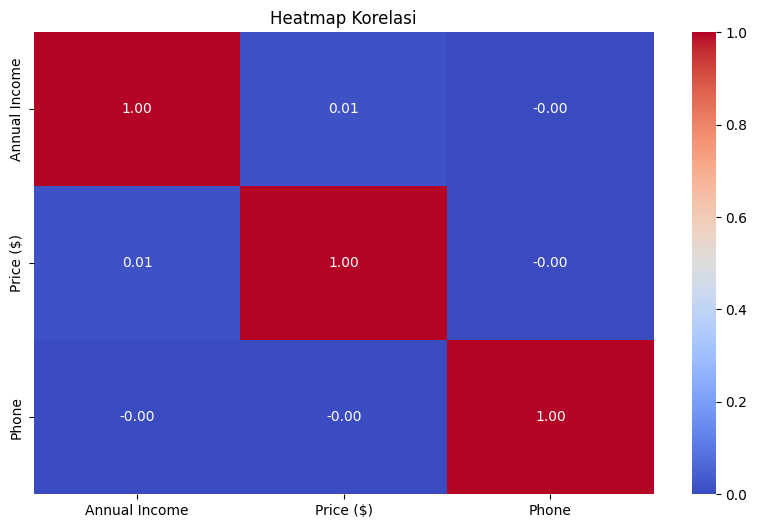

In [68]:
# Heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # Select only numeric columns for correlation
plt.title("Heatmap Korelasi")
plt.show()

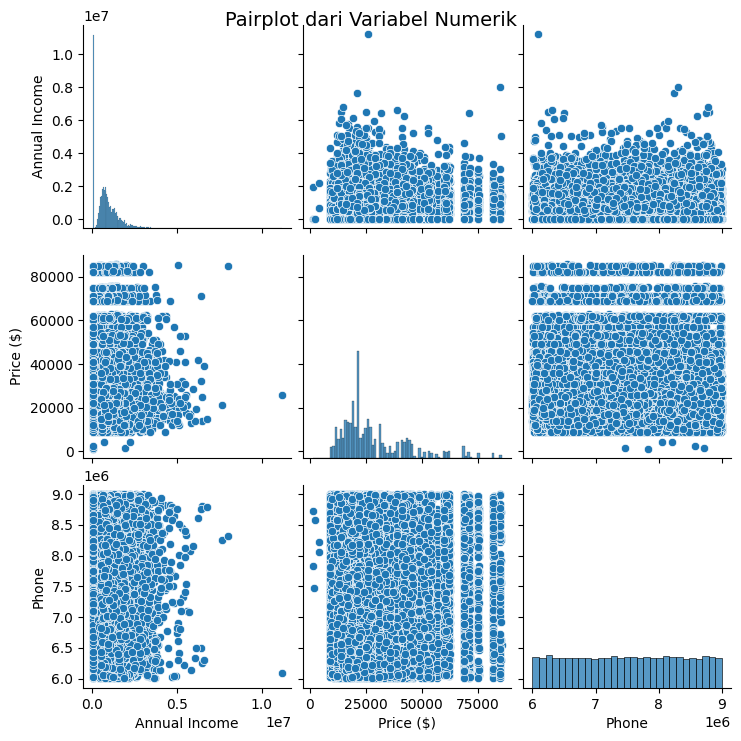

In [69]:
# Pairplot untuk melihat hubungan antar variabel
num_cols = df.select_dtypes(include=np.number).columns
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot dari Variabel Numerik", fontsize=14)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [70]:
# Mengatasi missing values
df = df.dropna()

In [71]:
# Hapus atribut unik yang tidak relevan untuk clustering
irrelevant_cols = ["Phone", "Car_id", "Customer Name", "Dealer_Name", "Dealer_No", "Date"]
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns], errors="ignore")

In [72]:
# Encoding data kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [73]:
# Normalisasi fitur
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['number']))

In [74]:
# Deteksi dan Penanganan Outlier pada data yang telah distandardisasi
from scipy.stats import zscore
z_scores = np.abs(zscore(df_scaled))
mask = (z_scores < 3).all(axis=1)
df_scaled = df_scaled[mask]

df = df.iloc[mask.nonzero()[0]]

In [75]:
# Binning (Pengelompokan Data)
if 'price' in df.columns:
    df['price_category'] = pd.qcut(df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [76]:
# Pilih algoritma clustering dan latih model
# Pastikan hanya ada 3 cluster
# Clustering dengan Agglomerative Clustering
n_clusters = 3
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

agg = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
df['Cluster'] = agg.fit_predict(df_pca)

# Menampilkan jumlah sampel dalam setiap cluster
print("Cluster Labels:\n", df['Cluster'].value_counts())

# Mengecek apakah masih ada cluster selain 0, 1, dan 2
unique_clusters = df["Cluster"].unique()
print("Cluster yang ditemukan dalam data:", unique_clusters)

# Cek apakah ada cluster di luar 0, 1, 2
if set(unique_clusters).issubset({0, 1, 2}):
    print("Semua data sudah termasuk dalam cluster 0, 1, atau 2.")
else:
    print("Ditemukan cluster selain 0, 1, dan 2! Periksa kembali model clustering.")

Cluster Labels:
 Cluster
1    12165
0     5857
2     5203
Name: count, dtype: int64
Cluster yang ditemukan dalam data: [2 0 1]
Semua data sudah termasuk dalam cluster 0, 1, atau 2.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

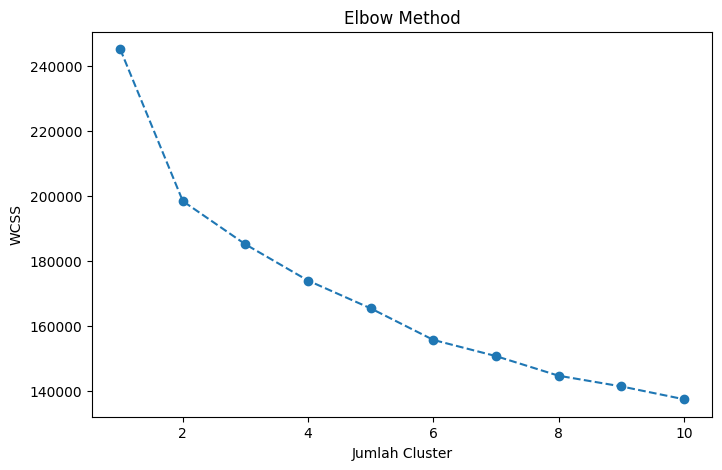

In [77]:
# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [78]:
# Evaluasi clustering
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.0248


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [79]:
df_numeric = df.select_dtypes(include=['number'])

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric)

n_features_before = df_numeric.shape[1]

k_best = 5
selector = SelectKBest(score_func=f_classif, k=k_best)
df_selected = selector.fit_transform(df_scaled, AgglomerativeClustering(n_clusters=3).fit_predict(df_scaled))

n_features_after = df_selected.shape[1]

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_selected)

agg_before = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_before = agg_before.fit_predict(df_scaled)
silhouette_before = silhouette_score(df_scaled, labels_before)

agg_after = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_after = agg_after.fit_predict(df_pca)
silhouette_after = silhouette_score(df_pca, labels_after)

print(f"Jumlah fitur sebelum Feature Selection: {n_features_before}")
print(f"Jumlah fitur setelah Feature Selection: {n_features_after}")
print(f"Silhouette Score sebelum Feature Selection: {silhouette_before:.4f}")
print(f"Silhouette Score setelah Feature Selection: {silhouette_after:.4f}")

if silhouette_after > silhouette_before:
    print("Feature selection meningkatkan performa clustering!")
else:
    print("Feature selection tidak meningkatkan performa clustering.")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Jumlah fitur sebelum Feature Selection: 12
Jumlah fitur setelah Feature Selection: 5
Silhouette Score sebelum Feature Selection: 0.2509
Silhouette Score setelah Feature Selection: 0.6540
Feature selection meningkatkan performa clustering!


In [80]:
# Simpan model terbaik berdasarkan silhouette score tertinggi
best_silhouette_score = max(silhouette_before, silhouette_after)

print(f"Model terbaik memiliki Silhouette Score: {best_silhouette_score:.4f}")

# Pastikan model terbaik digunakan dalam analisis dan visualisasi
if silhouette_after > silhouette_before:
    best_model = agg_after
    best_features = df_pca
else:
    best_model = agg_before
    best_features = df_scaled

df['Cluster'] = best_model.fit_predict(best_features)

Model terbaik memiliki Silhouette Score: 0.6540


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

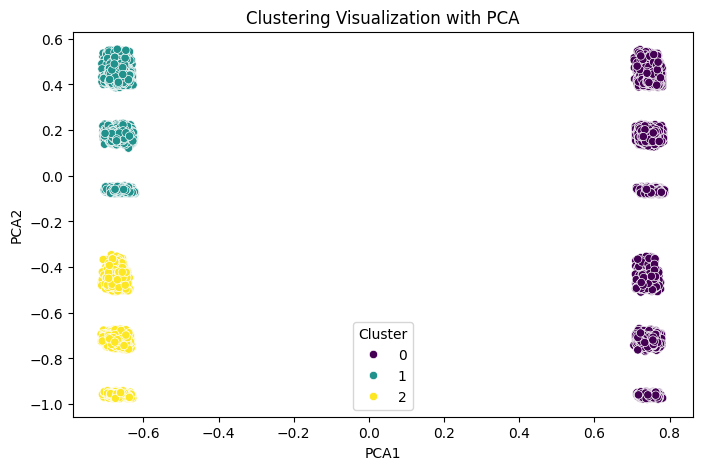

In [81]:
# Visualisasi PCA untuk clustering
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Visualization with PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [82]:
# Lakukan Inverse Transform pada Fitur yang Sudah Diberi Labelisasi
for col, le in label_encoders.items():
    unique_labels = set(le.classes_)
    df[col] = df[col].apply(lambda x: le.inverse_transform([x])[0] if x in range(len(unique_labels)) else x)

# Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
df_original = df.copy()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [83]:
# Inverse Transform untuk Data yang Distandarisasi
original_numeric_features = df_original.select_dtypes(include=['number']).columns

# Simpan scaler yang digunakan untuk normalisasi/standardisasi
original_scaler = StandardScaler()
original_scaler.fit(df_original[original_numeric_features])

# Buat variabel df_normalized dengan menyalin df_original
df_normalized = df_original.copy()
df_normalized[original_numeric_features] = original_scaler.inverse_transform(
    df_normalized[original_numeric_features]
)
df_original[original_numeric_features] = df_normalized[original_numeric_features]

categorical_features = df_original.select_dtypes(include=['object']).columns
df_original[categorical_features] = df[categorical_features]

# Tampilkan data original dengan data numerik dan kategorikal
print(df_original)

       Gender  Annual Income    Company       Model  \
0        Male   8.358265e+09       Ford  Expedition   
1        Male   9.162279e+11      Dodge     Durango   
2        Male   6.407407e+11   Cadillac    Eldorado   
3        Male   8.358265e+09     Toyota      Celica   
4        Male   9.069418e+11      Acura          TL   
...       ...            ...        ...         ...   
23901    Male   8.358265e+09   Plymouth     Voyager   
23902  Female   5.571659e+11  Chevrolet       Prizm   
23903    Male   4.364468e+11        BMW        328i   
23904    Male   8.358265e+09  Chevrolet       Metro   
23905    Male   7.583644e+11      Lexus       ES300   

                          Engine Transmission       Color     Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black  3.492485e+08   
1      DoubleÂ Overhead Camshaft         Auto       Black  2.552274e+08   
2              Overhead Camshaft       Manual         Red  4.231222e+08   
3              Overhead Camshaft       

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

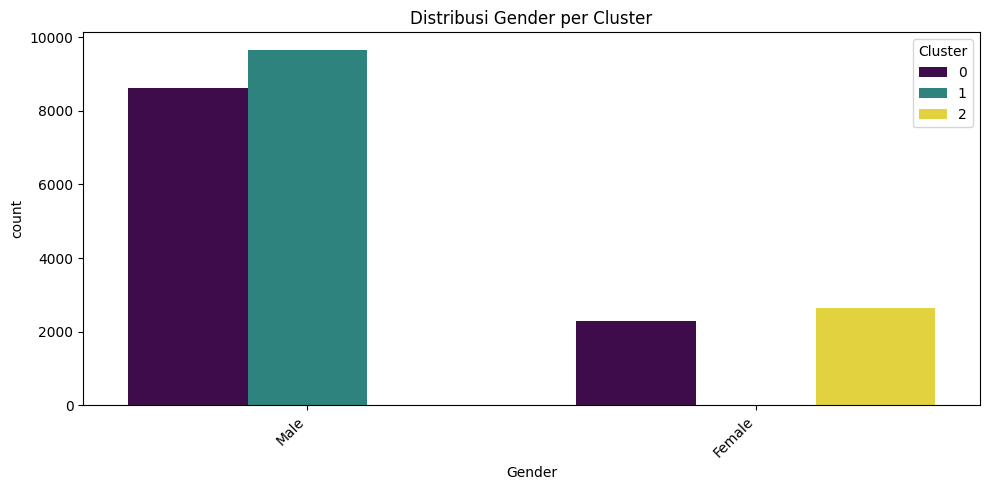


Statistik Deskriptif untuk Gender per Cluster:
Gender     Female      Male
Cluster                    
0        0.210469  0.789531
1        0.000000  1.000000
2        1.000000  0.000000


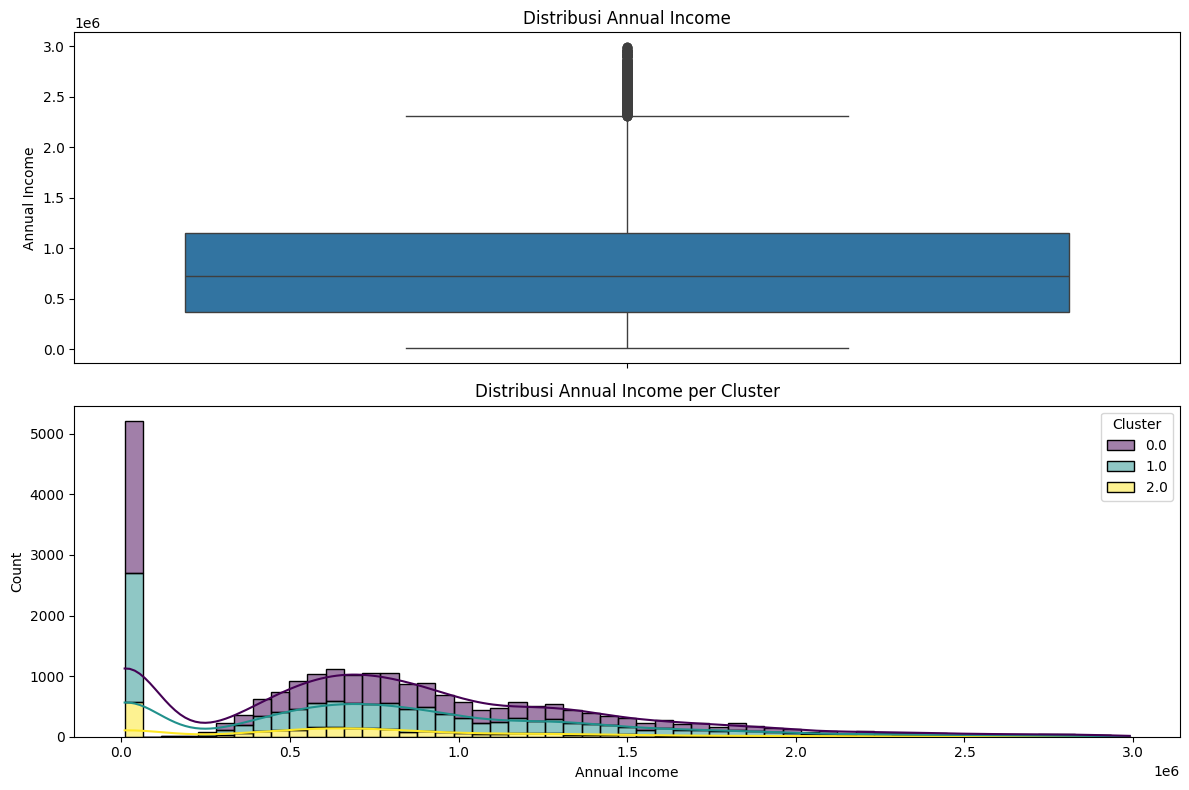

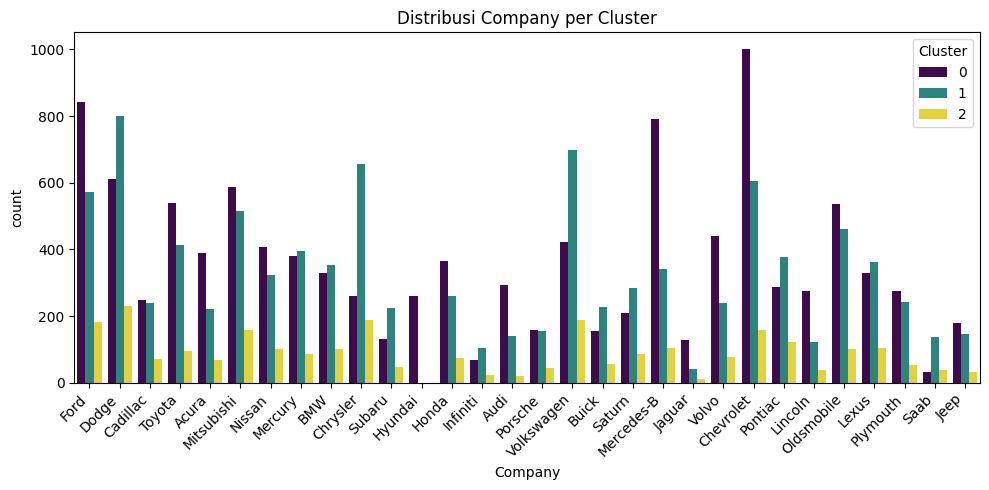


Statistik Deskriptif untuk Company per Cluster:
Company     Acura      Audi       BMW     Buick  Cadillac  Chevrolet  \
Cluster                                                                
0        0.035597  0.026720  0.030015  0.014092  0.022602   0.091600   
1        0.023008  0.014406  0.036688  0.023526  0.024666   0.062597   
2        0.025680  0.007553  0.037764  0.020770  0.026435   0.060045   

Company  Chrysler     Dodge      Ford     Honda  ...  Oldsmobile  Plymouth  \
Cluster                                          ...                         
0        0.023884  0.055911  0.076958  0.033492  ...    0.049140  0.025256   
1        0.067883  0.082910  0.059281  0.026946  ...    0.047777  0.025080   
2        0.070997  0.086858  0.069109  0.028323  ...    0.037764  0.019637   

Company   Pontiac   Porsche      Saab    Saturn    Subaru    Toyota  \
Cluster                                                               
0        0.026171  0.014458  0.003020  0.019217  0.011988

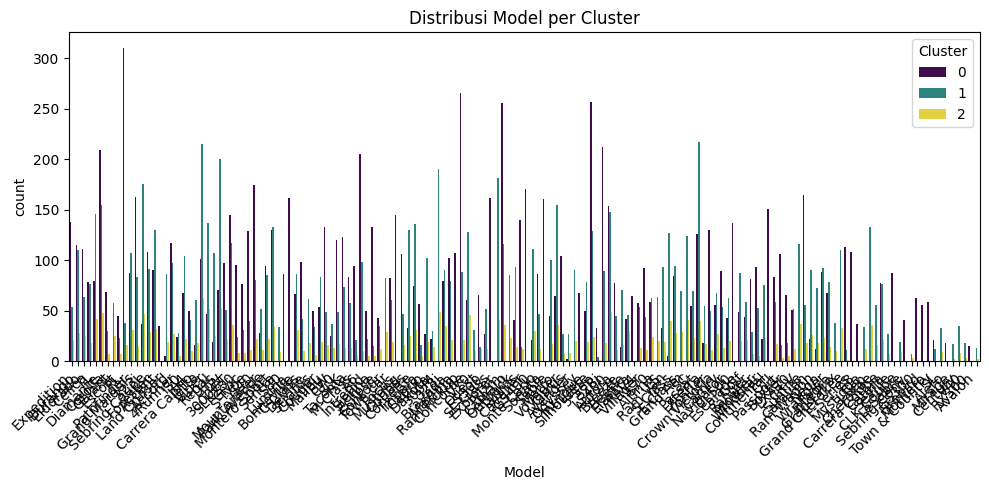


Statistik Deskriptif untuk Model per Cluster:
Model       3-Sep    3000GT      300M      323i      328i   4Runner     5-Sep  \
Cluster                                                                         
0        0.000000  0.013269  0.000000  0.003386  0.007229  0.002196  0.003020   
1        0.013784  0.012126  0.019691  0.018137  0.009327  0.002902  0.000415   
2        0.013595  0.013595  0.018505  0.017749  0.013218  0.001888  0.000378   

Model        528i        A4        A6  ...  Town & Country  Town car  \
Cluster                                ...                             
0        0.019400  0.004575  0.018759  ...        0.001922  0.007504   
1        0.009224  0.004249  0.010156  ...        0.001244  0.006218   
2        0.006798  0.003776  0.003776  ...        0.000000  0.007175   

Model         V40       V70  Villager     Viper   Voyager  Windstar  Wrangler  \
Cluster                                                                         
0        0.000000  0.000

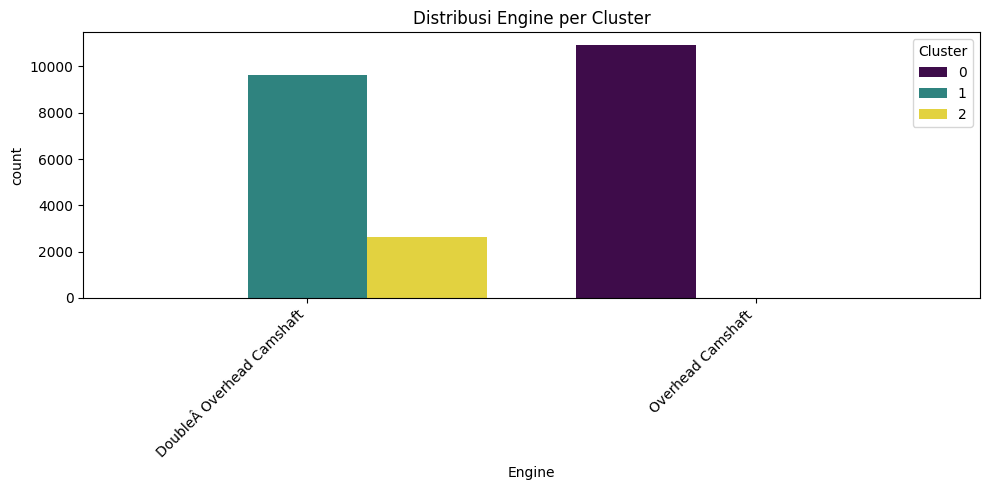


Statistik Deskriptif untuk Engine per Cluster:
Engine   DoubleÂ Overhead Camshaft  Overhead Camshaft
Cluster                                              
0                              0.0                1.0
1                              1.0                0.0
2                              1.0                0.0


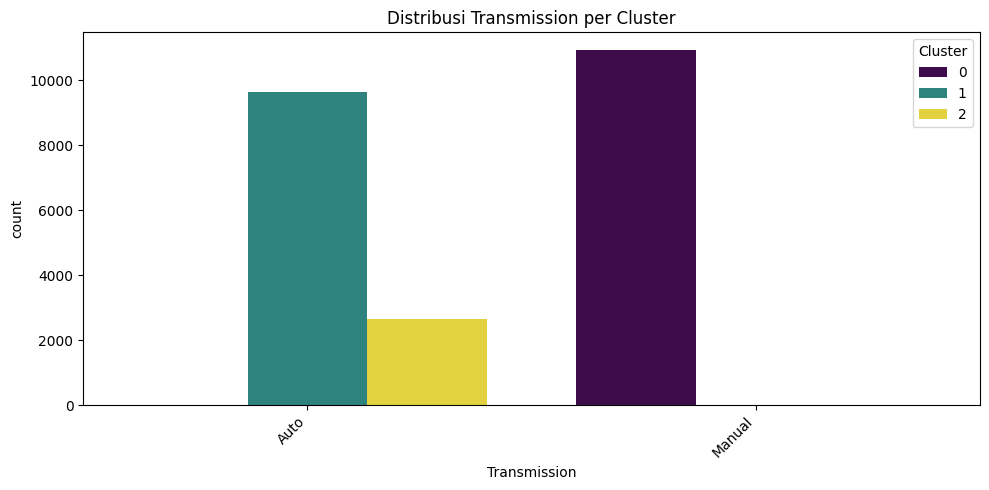


Statistik Deskriptif untuk Transmission per Cluster:
Transmission  Auto  Manual
Cluster                   
0              0.0     1.0
1              1.0     0.0
2              1.0     0.0


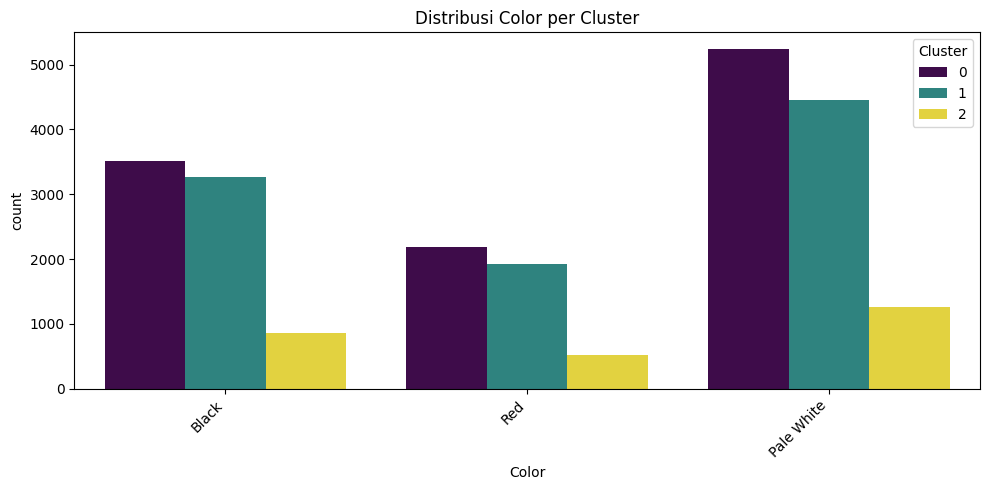


Statistik Deskriptif untuk Color per Cluster:
Color       Black  Pale White       Red
Cluster                                
0        0.321193    0.479045  0.199762
1        0.338066    0.462120  0.199813
2        0.322508    0.478097  0.199396


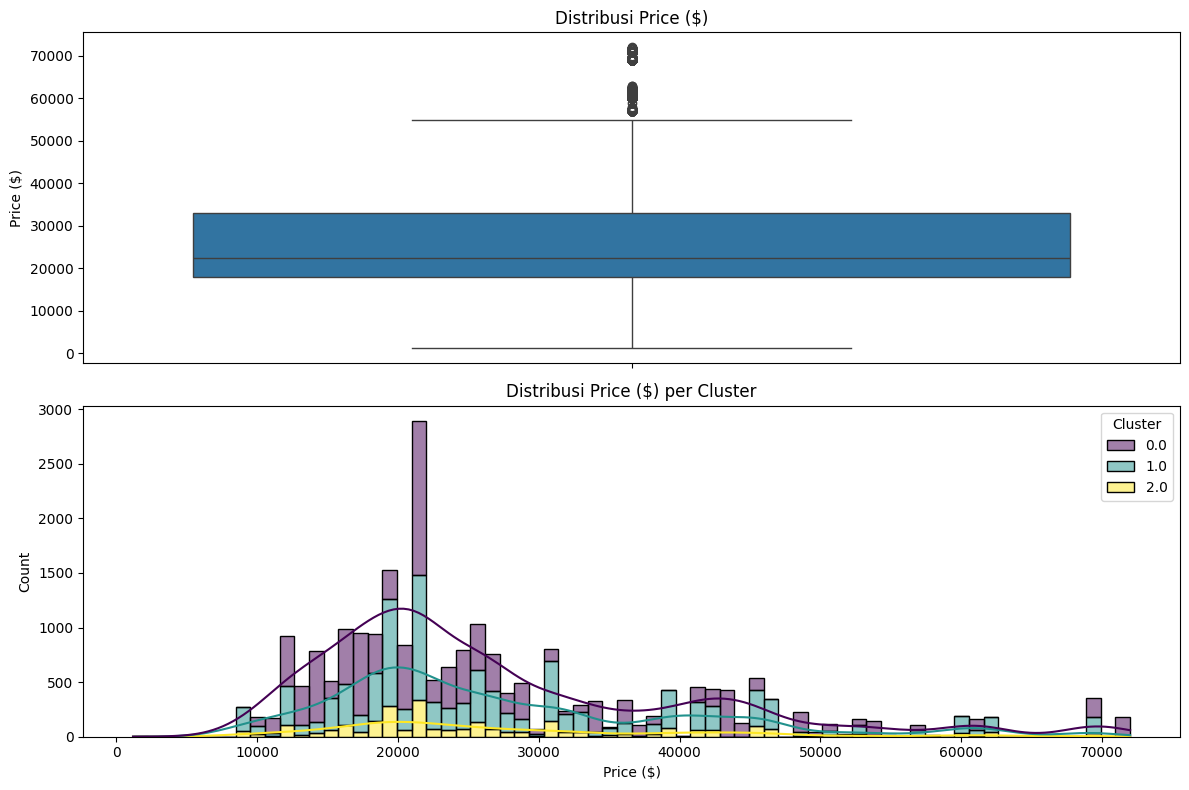

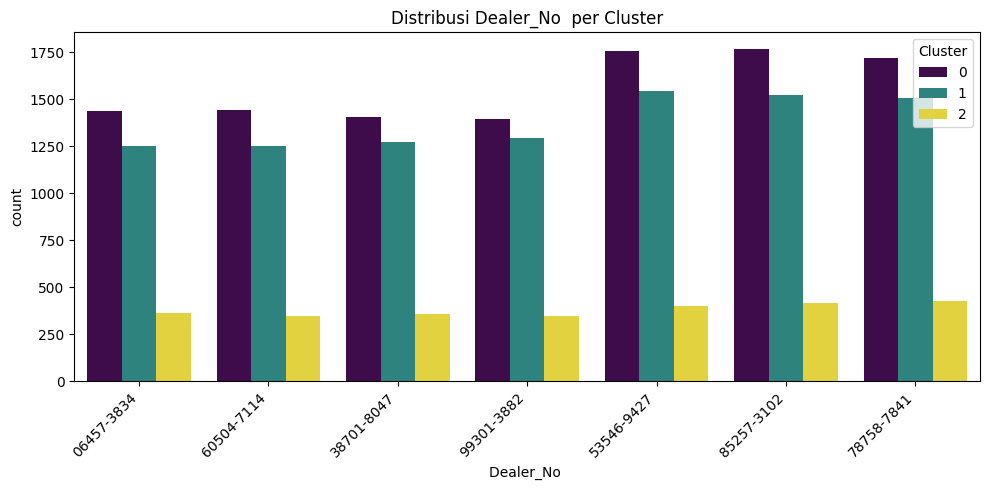


Statistik Deskriptif untuk Dealer_No  per Cluster:
Dealer_No   06457-3834  38701-8047  53546-9427  60504-7114  78758-7841  \
Cluster                                                                  
0             0.131589    0.128660    0.160871    0.132046    0.157485   
1             0.129443    0.132138    0.160120    0.129962    0.156286   
2             0.136707    0.134819    0.151435    0.129909    0.160121   

Dealer_No   85257-3102  99301-3882  
Cluster                             
0             0.161786    0.127562  
1             0.157840    0.134211  
2             0.156722    0.130287  


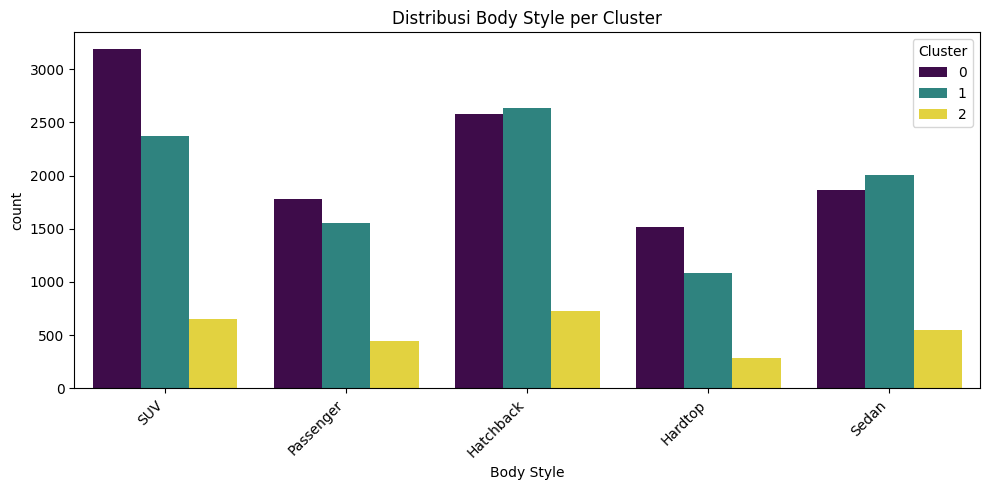


Statistik Deskriptif untuk Body Style per Cluster:
Body Style   Hardtop  Hatchback  Passenger       SUV     Sedan
Cluster                                                       
0           0.138818   0.235999   0.162976  0.291545  0.170663
1           0.111929   0.273396   0.160638  0.246139  0.207897
2           0.106118   0.273036   0.166541  0.246224  0.208082


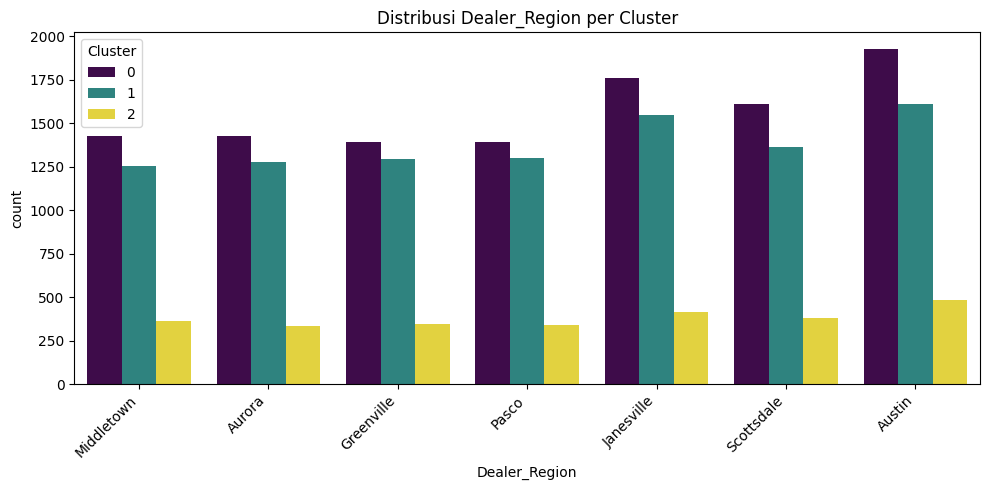


Statistik Deskriptif untuk Dealer_Region per Cluster:
Dealer_Region    Aurora    Austin  Greenville  Janesville  Middletown  \
Cluster                                                                 
0              0.130399  0.176245    0.127196    0.160871    0.130765   
1              0.132449  0.167168    0.133900    0.160327    0.130065   
2              0.125000  0.181647    0.130287    0.156344    0.136329   

Dealer_Region     Pasco  Scottsdale  
Cluster                              
0              0.127196    0.147328  
1              0.134625    0.141465  
2              0.127644    0.142749  


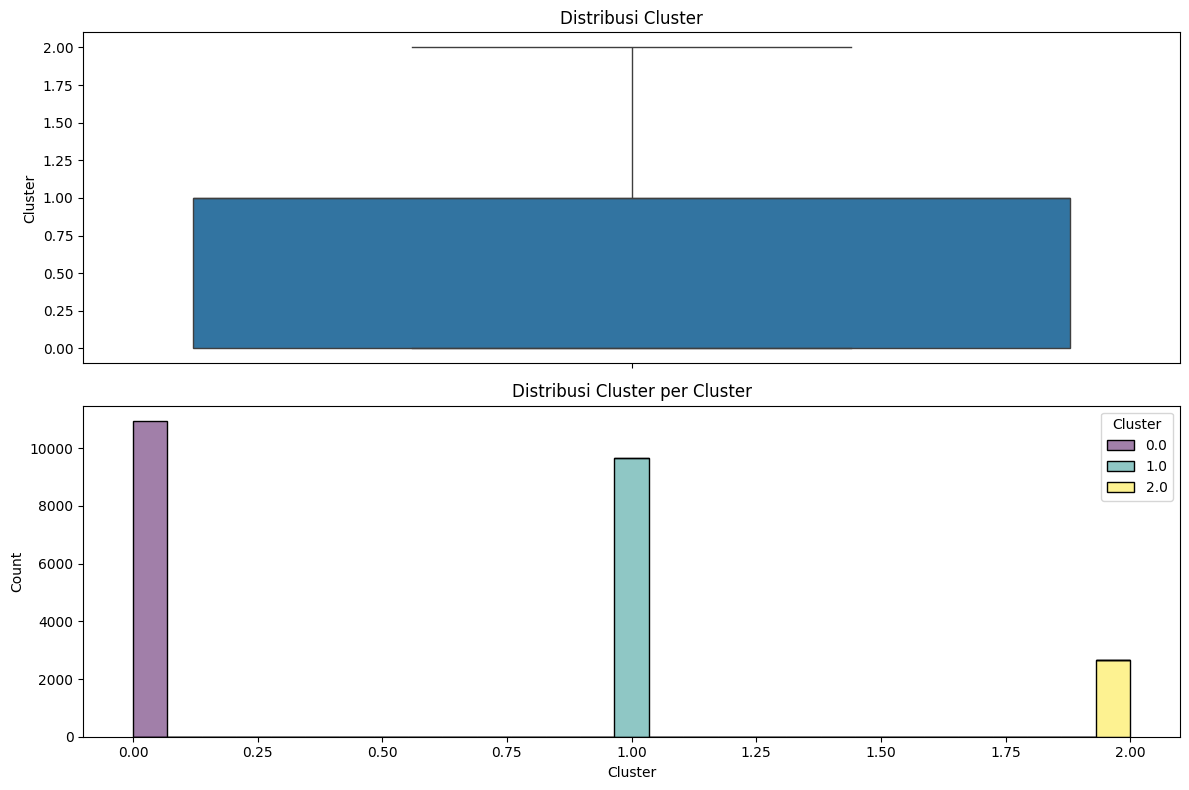

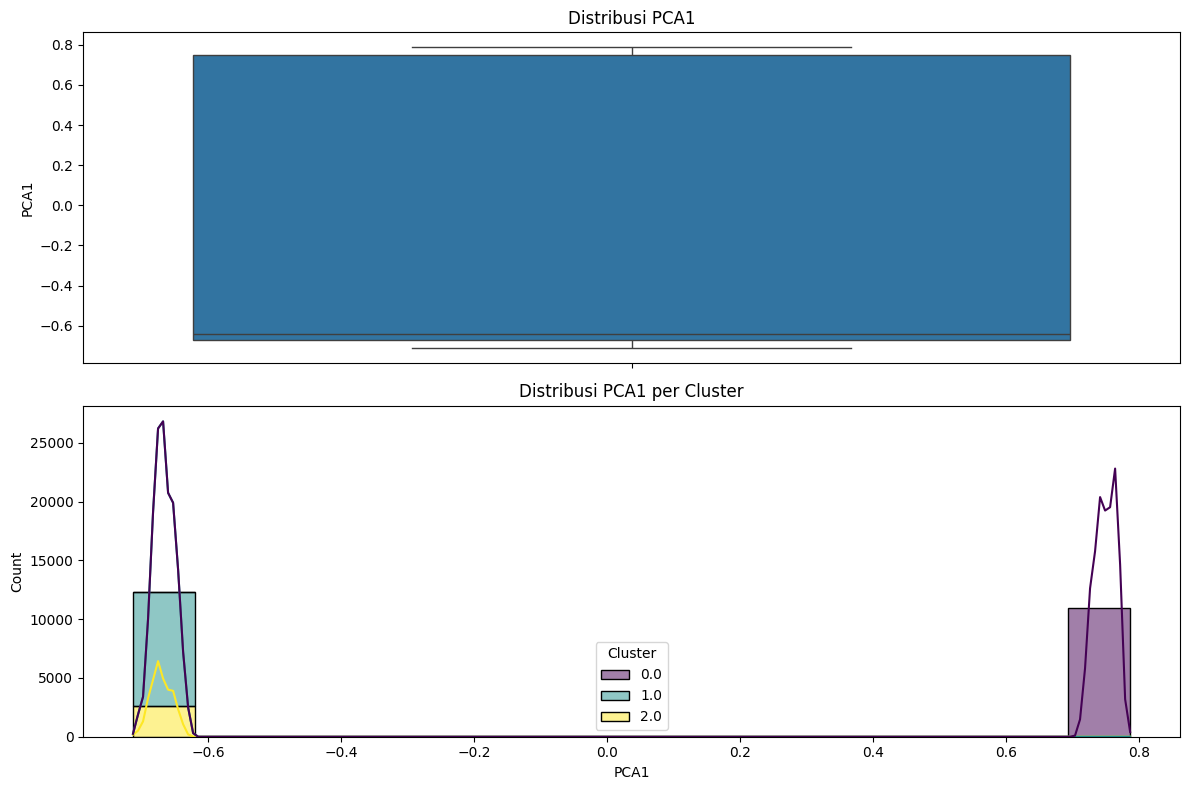

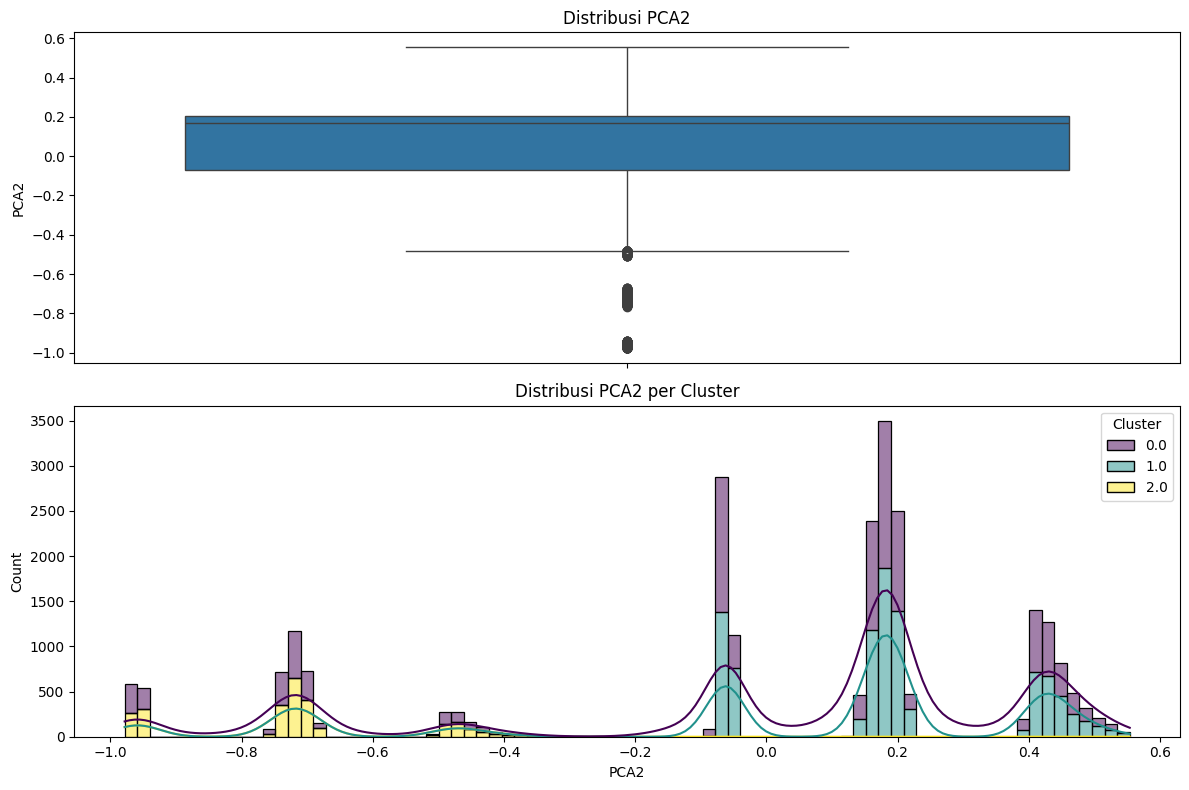

In [84]:
# Analisis dan visualisasi untuk data numerik dan kategorikal
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

imputer = SimpleImputer(strategy='mean')
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

df_imputed = df_numeric.copy()

imputer = SimpleImputer(strategy='mean')
df_imputed[numeric_cols] = imputer.fit_transform(df_imputed)


for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is categorical
        # Visualisasi data kategorikal menggunakan countplot
        plt.figure(figsize=(10, 5))
        sns.countplot(x=column, data=df, hue='Cluster', palette='viridis')
        plt.title(f'Distribusi {column} per Cluster')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()

        # Analisis statistik deskriptif untuk data kategorikal
        print(f'\nStatistik Deskriptif untuk {column} per Cluster:')
        print(pd.crosstab(df['Cluster'], df[column], normalize='index'))  # Show percentage distribution

    else:  # If column is numerical
        # Visualisasi data numerik menggunakan boxplot dan histplot (same as before)
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 1, 1)  # Create subplots for boxplot and histplot
        sns.boxplot(y=column, data=df_imputed)
        plt.title(f"Distribusi {column}")
        plt.tight_layout()

        plt.subplot(2, 1, 2)
        sns.histplot(df_imputed, x=column, hue="Cluster", multiple="stack", kde=True, palette="viridis")
        plt.title(f"Distribusi {column} per Cluster")
        plt.tight_layout()

        plt.show()

In [85]:
print("\n Interpretasi Hasil Clustering")

# Gabungkan kolom numerik dan kategorikal yang relevan
analysis_cols = numeric_cols.tolist()
# tambahkan kolom kategorikal yang ingin dianalisis
for col in df.columns:
    if df[col].dtype == 'object' and col not in ['Customer Name', 'Phone', 'Car_id', 'Dealer_Name', 'Dealer_No', 'Date', 'price_category']:
        analysis_cols.append(col)

# Inisialisasi dictionary untuk menyimpan statistik kategorikal per cluster
cluster_stats_categorical = {}
cluster_sizes = df['Cluster'].value_counts().to_dict()

# Pilih hanya kolom numerik untuk menghitung mean
numeric_df = df.select_dtypes(include=np.number)
cluster_stats_mean = numeric_df.groupby('Cluster').mean()

for cluster in range(3):
    cluster_stats_categorical[cluster] = {}
    print(f"\nKarakteristik Cluster {cluster:.1f}:")
    cluster_data = df[df['Cluster'] == cluster]

    # Iterasi melalui kolom untuk analisis
    for feature in analysis_cols:
        if feature in numeric_cols:
            if feature == 'price':
                print(f"- Rata-rata {feature} ($): {cluster_data[feature].mean():.2f}")
            else:
                print(f"- Rata-rata {feature}: {cluster_data[feature].mean():.2f}")
        elif feature in df.select_dtypes(include=['object']).columns:
            # Hitung modus (nilai yang paling sering muncul) untuk fitur kategorikal
            mode_value = cluster_data[feature].mode()[0]
            print(f"- Modus {feature}: {mode_value}")

            cluster_stats_categorical[cluster][feature] = mode_value

    if 'num_comments' in numeric_cols:
        comment_quantiles = df_imputed['num_comments'].quantile([0.33, 0.66])

        if cluster_stats_mean.loc[cluster, 'num_comments'] > comment_quantiles[0.66]:
            comment_level = 'Tinggi'
        elif cluster_stats_mean.loc[cluster, 'num_comments'] > comment_quantiles[0.33]:
            comment_level = 'Sedang'
        else:
            comment_level = 'Rendah'

        print(f"- Rata-rata jumlah komentar: {comment_level}")

    if 'num_reactions' in numeric_cols:
        reaction_quantiles = df_imputed['num_reactions'].quantile([0.33, 0.66])

        if cluster_stats_mean.loc[cluster, 'num_reactions'] > reaction_quantiles[0.66]:
            reaction_level = 'Tinggi'
        elif cluster_stats_mean.loc[cluster, 'num_reactions'] > reaction_quantiles[0.33]:
            reaction_level = 'Sedang'
        else:
            reaction_level = 'Rendah'

        print(f"- Engagement rata-rata: {reaction_level}")

    print(f"- Jumlah data di cluster {cluster:.1f}: {cluster_sizes[cluster]} data")


 Interpretasi Hasil Clustering

Karakteristik Cluster 0.0:
- Rata-rata Annual Income: 784520.30
- Rata-rata Price ($): 26647.72
- Rata-rata Cluster: 0.00
- Rata-rata PCA1: 0.75
- Rata-rata PCA2: -0.00
- Modus Gender: Male
- Modus Company: Chevrolet
- Modus Model: RL
- Modus Engine: Overhead Camshaft
- Modus Transmission: Manual
- Modus Color: Pale White
- Modus Dealer_No : 85257-3102
- Modus Body Style: SUV
- Modus Dealer_Region: Austin
- Jumlah data di cluster 0.0: 10928 data

Karakteristik Cluster 1.0:
- Rata-rata Annual Income: 810280.29
- Rata-rata Price ($): 27955.09
- Rata-rata Cluster: 1.00
- Rata-rata PCA1: -0.67
- Rata-rata PCA2: 0.20
- Modus Gender: Male
- Modus Company: Dodge
- Modus Model: Passat
- Modus Engine: DoubleÂ Overhead Camshaft
- Modus Transmission: Auto
- Modus Color: Pale White
- Modus Dealer_No : 53546-9427
- Modus Body Style: Hatchback
- Modus Dealer_Region: Austin
- Jumlah data di cluster 1.0: 9649 data

Karakteristik Cluster 2.0:
- Rata-rata Annual Income: 

Berikut adalah interpretasi hasil clustering berdasarkan karakteristik setiap cluster:  

### **Cluster 0**
- Rata-rata Pendapatan Tahunan: \$784,520.30
- Rata-rata Harga Mobil: \$26,647.72
- Modus Gender: Laki-laki
- Modus Merek Mobil: Chevrolet
- Modus Model Mobil: RL
- Modus Jenis Mesin: Overhead Camshaft
- Modus Transmisi: Manual
- Modus Warna: Putih Pucat
- Modus Gaya Bodi: SUV
- Modus Wilayah Dealer: Austin
- Jumlah Data: 10.928
- Analisis: Kelompok ini mayoritas terdiri dari pria dengan rata-rata pendapatan yang cukup tinggi. Mereka lebih cenderung membeli mobil Chevrolet dengan model RL yang memiliki transmisi manual dan mesin Overhead Camshaft. Pilihan mobil SUV menunjukkan bahwa mereka membutuhkan kendaraan yang lebih fleksibel untuk berbagai keperluan.

### **Cluster 1**
- Rata-rata Pendapatan Tahunan: \$810,280.29
- Rata-rata Harga Mobil: \$27,955.09
- Modus Gender: Laki-laki
- Modus Merek Mobil: Dodge
- Modus Model Mobil: Passat
- Modus Jenis Mesin: Double Overhead Camshaft
- Modus Transmisi: Otomatis
- Modus Warna: Putih Pucat
- Modus Gaya Bodi: Hatchback
- Modus Wilayah Dealer: Austin
- Jumlah Data: 9.649
- Analisis: Kelompok ini juga mayoritas terdiri dari pria, dengan pendapatan rata-rata sedikit lebih tinggi dibanding Cluster 0. Konsumen dalam kelompok ini lebih memilih mobil Dodge Passat dengan transmisi otomatis dan mesin Double Overhead Camshaft. Pemilihan gaya bodi hatchback menunjukkan bahwa mereka mungkin mencari kendaraan yang lebih kompak dan efisien untuk mobilitas perkotaan.

### **Cluster 2**
- Rata-rata Pendapatan Tahunan: $724,015.28
- Rata-rata Harga Mobil: $27,546.43
- Modus Gender: Perempuan
- Modus Merek Mobil: Dodge
- Modus Model Mobil: Jetta
- Modus Jenis Mesin: Double Overhead Camshaft
- Modus Transmisi: Otomatis
- Modus Warna: Putih Pucat
- Modus Gaya Bodi: Hatchback
- Modus Wilayah Dealer: Austin
- Jumlah Konsumen: 2.648
- Analisis: Cluster ini didominasi oleh perempuan dengan pendapatan rata-rata lebih rendah dibanding dua cluster lainnya. Mereka lebih cenderung membeli Dodge Jetta dengan transmisi otomatis dan mesin Double Overhead Camshaft. Sama seperti Cluster 1, pilihan gaya bodi hatchback menunjukkan preferensi terhadap kendaraan yang lebih kompak dan praktis untuk penggunaan sehari-hari.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [86]:
# Simpan hasil clustering
df.to_csv("car_sales_clustered.csv", index=False)